In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
     


In [63]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,
                        n_classes=2,n_redundant=0,n_clusters_per_class=1,random_state=11)

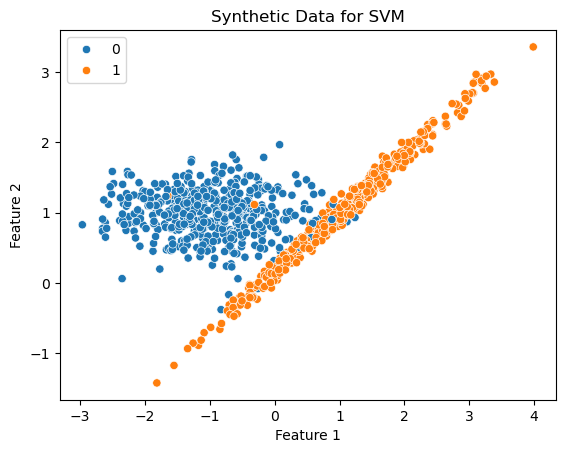

In [64]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)
plt.title("Synthetic Data for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [65]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [67]:
y_pred = svc.predict(x_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.97      0.99      0.98       151

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[144   5]
 [  1 150]]


In [69]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train, y_train)
y_pred_rbf = rbf.predict(x_test)
print(classification_report(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       149
           1       0.96      0.99      0.98       151

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[143   6]
 [  1 150]]


In [70]:
poly=SVC(kernel='poly')
poly.fit(x_train, y_train)
y_pred_poly = poly.predict(x_test)
print(classification_report(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       149
           1       0.90      0.99      0.94       151

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300

[[132  17]
 [  1 150]]


In [71]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(x_train, y_train)
y_pred_sigmoid = sigmoid.predict(x_test)
print(classification_report(y_test, y_pred_sigmoid))
print(confusion_matrix(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       149
           1       0.77      0.74      0.75       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

[[115  34]
 [ 39 112]]


## Hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV
# defining parameter ranges
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [76]:
grid=GridSearchCV(svc, param_grid,cv=5, verbose=3,refit=True)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.936 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.936 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.936 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.971 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [77]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [78]:
y_pred2=grid.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.97      0.99      0.98       151

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[144   5]
 [  1 150]]
